# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Approved
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant per month
* **CoapplicantIncome:** Income of the co-applicant per month
* **LoanAmount:** Loan amount requested in *1000 dollars
* **Loan_Amount_Term:** Term of the loan in months
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

# Import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [132]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not_Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [134]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Approved         object
dtype: object

### Missing value imputation

In [135]:
# convert columns to object type
df['Credit_History'] = df['Credit_History'].astype('object')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('object')

In [136]:
# impute all missing values in all the features
#Categorical variables
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

#Numerical variable
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


### Data Prep

In [137]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)

In [138]:
# replace values in Loan_approved column
df['Loan_Approved'] = df['Loan_Approved'].replace({'Y':1, 'N':0})

In [139]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

In [140]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Male,Married_Yes,Education_Not_Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,True
1,1.0,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,0.0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,0.0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,1,False,False,False,False,False,False
610,3.0,4106,0.0,40.0,180.0,1.0,1,True,True,False,False,False,False
611,1.0,8072,240.0,253.0,360.0,1.0,1,True,True,False,False,False,True
612,2.0,7583,0.0,187.0,360.0,1.0,1,True,True,False,False,False,True


### Data Partition

In [122]:
# Seperate the input features and target variable
x = df.drop('Loan_Approved',axis=1)
y = df.Loan_Approved

In [123]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y)

In [119]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression().fit(xtrain_scaled, ytrain)

In [72]:
# Predict the loan eligibility on testing set and calculate its accuracy.
# First, from sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = lrmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.6910569105691057

In [73]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
ytest

412    0
43     1
134    1
573    0
513    0
      ..
542    1
376    1
451    1
158    1
295    1
Name: Loan_Approved, Length: 123, dtype: int64

In [75]:
# Print the confusion matrix
confusion_matrix(ytest, ypred)

array([[ 0, 38],
       [ 0, 85]], dtype=int64)

In [76]:
# to check how probabilities are assigned
pypred = lrmodel.predict_proba(xtest_scaled)

In [77]:
pypred

array([[0.25997026, 0.74002974],
       [0.27383693, 0.72616307],
       [0.40831967, 0.59168033],
       [0.24774255, 0.75225745],
       [0.41974619, 0.58025381],
       [0.19600312, 0.80399688],
       [0.32167329, 0.67832671],
       [0.29690535, 0.70309465],
       [0.222706  , 0.777294  ],
       [0.2700107 , 0.7299893 ],
       [0.26806229, 0.73193771],
       [0.27601073, 0.72398927],
       [0.23509645, 0.76490355],
       [0.43308818, 0.56691182],
       [0.26507325, 0.73492675],
       [0.3030243 , 0.6969757 ],
       [0.23306069, 0.76693931],
       [0.23338038, 0.76661962],
       [0.33204334, 0.66795666],
       [0.24109238, 0.75890762],
       [0.37915985, 0.62084015],
       [0.34650993, 0.65349007],
       [0.24348773, 0.75651227],
       [0.38305878, 0.61694122],
       [0.47517708, 0.52482292],
       [0.25737077, 0.74262923],
       [0.22384272, 0.77615728],
       [0.24433275, 0.75566725],
       [0.24269609, 0.75730391],
       [0.40002914, 0.59997086],
       [0.

In [78]:
# to change the default threshold and to make it 70% and above
proba_pred = (pypred[:, 1] >= 0.7).astype(int)

In [79]:
accuracy_score(proba_pred, ytest)

0.5121951219512195

## <font color='chocolate'>**Decision Tree**

In [127]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Approved', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [124]:
dtmodel = DecisionTreeClassifier(max_depth=2, max_features=10)
dtmodel.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2, max_features=10)

### Save the model

In [125]:
#create a file named random_forest_credit.pickle in write-binary mode
dt_pickle = open("decision_tree_credit.pickle", "wb")

#serialize the model object rfmodel and write it to the file rf_pickle.
pickle.dump(dtmodel, dt_pickle)
dt_pickle.close()

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')

# convert columns to object type
df['Credit_History'] = df['Credit_History'].astype('object')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('object')

# impute all missing values in all the features
#Categorical variables
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

#Numerical variable
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Data Prep
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)

# replace values in Loan_approved column
df['Loan_Approved'] = df['Loan_Approved'].replace({'Y':1, 'N':0})

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

df.columns

# Data Partition
# Seperate the input features and target variable
x = df.drop('Loan_Approved',axis=1)
y = df.Loan_Approved

# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y)

# MODEL
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=8)
rfmodel.fit(xtrain, ytrain)


In [145]:
xtrain.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not_Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [147]:
xtrain.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not_Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [148]:
rfmodel.feature_importances_

array([0.        , 0.        , 0.04870498, 0.03702022, 0.        ,
       0.88729294, 0.        , 0.        , 0.        , 0.        ,
       0.02698186, 0.        ])

In [155]:
list(df.columns)

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Approved',
 'Gender_Male',
 'Married_Yes',
 'Education_Not_Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

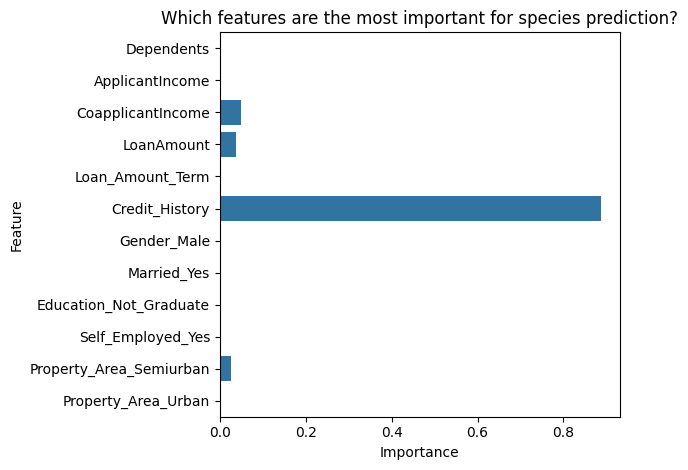

In [162]:


ax = sns.barplot(x=rfmodel.feature_importances_, y=x.columns)
plt.title("Which features are the most important for species prediction?")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
fig.savefig("feature_importance.png")

In [158]:
penguin_df = pd.read_csv("penguins.csv")
penguin_df.dropna(inplace=True)
output = penguin_df["species"]
features = penguin_df[
    [
        "island",
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
        "sex",
    ]
]
features = pd.get_dummies(features)
output, uniques = pd.factorize(output)

In [159]:
features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,False,True,False,False,True
